# Pokemon Dataset Analysis

## Import des modules nécessaires

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import re

## Récupération du dataset

In [246]:
# Data set from : https://www.kaggle.com/kylekohnen/complete-pokemon-data-set
# openpyxl est requis pour la lecture de fichier xlsx. Il faut xlrd pour les fichiers xls.
# Il est possible de rejouter des normes d'encodages pour resoudre les conflits de caractères
df = pd.read_csv('Files/pokemon.csv')
np = pd.read_excel('Files/national_pokedex.xlsx')
npcsv = pd.read_csv('Files/national_pokedex_2.csv', encoding='latin-1')

## Essai des fonctions de bases

In [5]:
# Affichage du DF (5 en head / tail par defaut)
df.head()

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5


In [224]:
# Connaitre le nombre de colonnes et de lignes du dataframes
df.shape

(1118, 49)

In [247]:
# Affiche l'ensemble des lignes. Cet fonction s'execute une fois et s'applique à l'ensemble du document.
pd.set_option('display.max_rows', None)

# Affiche l'ensemble des colonnes. Cet fonction s'execute une fois et s'applique à l'ensemble du document.
pd.set_option('display.max_columns', None)
#df

In [122]:
list(df.columns)

['name',
 'pokedex_number',
 'abilities',
 'typing',
 'hp',
 'attack',
 'defense',
 'special_attack',
 'special_defense',
 'speed',
 'height',
 'weight',
 'genus',
 'gen_introduced',
 'female_rate',
 'genderless',
 'baby_pokemon',
 'legendary',
 'mythical',
 'is_default',
 'forms_switchable',
 'base_experience',
 'capture_rate',
 'egg_groups',
 'egg_cycles',
 'base_happiness',
 'can_evolve',
 'evolves_from',
 'primary_color',
 'shape',
 'number_pokemon_with_typing',
 'normal_attack_effectiveness',
 'fire_attack_effectiveness',
 'water_attack_effectiveness',
 'electric_attack_effectiveness',
 'grass_attack_effectiveness',
 'ice_attack_effectiveness',
 'fighting_attack_effectiveness',
 'poison_attack_effectiveness',
 'ground_attack_effectiveness',
 'fly_attack_effectiveness',
 'psychic_attack_effectiveness',
 'bug_attack_effectiveness',
 'rock_attack_effectiveness',
 'ghost_attack_effectiveness',
 'dragon_attack_effectiveness',
 'dark_attack_effectiveness',
 'steel_attack_effectiveness',

In [229]:
# Affiche les types du DF.
df.dtypes

name                              object
pokedex_number                     int64
abilities                         object
typing                            object
hp                                 int64
attack                             int64
defense                            int64
special_attack                     int64
special_defense                    int64
speed                              int64
height                             int64
weight                             int64
genus                             object
gen_introduced                     int64
female_rate                      float64
genderless                          bool
baby_pokemon                        bool
legendary                           bool
mythical                            bool
is_default                          bool
forms_switchable                    bool
base_experience                    int64
capture_rate                       int64
egg_groups                        object
egg_cycles      

In [34]:
# Affiche le nombre de valeurs uniques
df.nunique()

name                             1118
pokedex_number                    898
abilities                         605
typing                            192
hp                                103
attack                            123
defense                           114
special_attack                    119
special_defense                   107
speed                             127
height                             83
weight                            479
genus                             645
gen_introduced                      8
female_rate                         7
genderless                          2
baby_pokemon                        2
legendary                           2
mythical                            2
is_default                          2
forms_switchable                    2
base_experience                   193
capture_rate                       34
egg_groups                         63
egg_cycles                         10
base_happiness                      7
can_evolve  

In [35]:
# Affiche l'index
df.index

RangeIndex(start=0, stop=1118, step=1)

In [228]:
# Affiche les données principales du DF (colonnes, non-null, types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           1118 non-null   object 
 1   pokedex_number                 1118 non-null   int64  
 2   abilities                      1118 non-null   object 
 3   typing                         1118 non-null   object 
 4   hp                             1118 non-null   int64  
 5   attack                         1118 non-null   int64  
 6   defense                        1118 non-null   int64  
 7   special_attack                 1118 non-null   int64  
 8   special_defense                1118 non-null   int64  
 9   speed                          1118 non-null   int64  
 10  height                         1118 non-null   int64  
 11  weight                         1118 non-null   int64  
 12  genus                          1118 non-null   o

In [244]:
## Vérification des isnull avec sum. Null = case sans valeur (la case est présente).
df.isnull()
## .any Vérifie si il y a au moins un Null. Si pas de Null == False, sinon True. Il est possible d'utiliser .all pour voir uniquement les colonnes False
df.isnull().any()
## Compte le nombre de Null
df.isnull().sum()

name                             False
pokedex_number                   False
abilities                        False
typing                           False
hp                               False
attack                           False
defense                          False
special_attack                   False
special_defense                  False
speed                            False
height                           False
weight                           False
genus                            False
gen_introduced                   False
female_rate                      False
genderless                       False
baby_pokemon                     False
legendary                        False
mythical                         False
is_default                       False
forms_switchable                 False
base_experience                  False
capture_rate                     False
egg_groups                       False
egg_cycles                       False
base_happiness           

In [5]:
## Verifie si il y a des données manquantes de type NaN ( NaN = Not a Number )
df.isna()
## Renvoi un True / False sur les colonnes avec un NaN
df.isna().any()
## Compte le nombre de NaN
df.isna().sum()

name                               0
pokedex_number                     0
abilities                          0
typing                             0
hp                                 0
attack                             0
defense                            0
special_attack                     0
special_defense                    0
speed                              0
height                             0
weight                             0
genus                              0
gen_introduced                     0
female_rate                        0
genderless                         0
baby_pokemon                       0
legendary                          0
mythical                           0
is_default                         0
forms_switchable                   0
base_experience                    0
capture_rate                       0
egg_groups                         0
egg_cycles                         0
base_happiness                     0
can_evolve                         0
e

In [58]:
# Sort les statistiques de base (arrondi grace à round à deux chiffres après la virgule)
round(df.describe(),2)

,pokedex_number,hp,attack,defense,special_attack,special_defense,speed,height,weight,gen_introduced,female_rate,base_experience,capture_rate,egg_cycles,base_happiness,number_pokemon_with_typing,normal_attack_effectiveness,fire_attack_effectiveness,water_attack_effectiveness,electric_attack_effectiveness,grass_attack_effectiveness,ice_attack_effectiveness,fighting_attack_effectiveness,poison_attack_effectiveness,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
count,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00,1118.00
mean,446.92,70.03,80.68,74.76,73.23,72.57,69.48,21.43,993.31,4.13,0.38,157.02,92.73,31.05,62.57,22.43,0.86,1.13,1.07,1.05,1.00,1.21,1.07,0.95,1.14,1.15,0.98,0.99,1.24,1.02,0.97,1.07,1.00,1.09
std,270.92,26.65,32.06,30.95,32.45,27.78,30.04,58.16,2067.91,2.34,0.25,78.84,75.68,30.02,21.48,22.90,0.29,0.69,0.61,0.64,0.74,0.76,0.75,0.54,0.79,0.59,0.50,0.61,0.70,0.57,0.38,0.47,0.52,0.54
min,1.00,1.00,5.00,5.00,10.00,20.00,5.00,1.00,1.00,1.00,0.00,36.00,3.00,5.00,0.00,1.00,0.00,0.25,0.25,0.00,0.25,0.25,0.00,0.00,0.00,0.25,0.00,0.25,0.25,0.00,0.00,0.25,0.25,0.25
25%,207.25,50.00,55.00,50.25,50.00,50.00,45.00,5.00,88.00,2.00,0.12,70.00,45.00,20.00,70.00,5.00,1.00,0.50,0.50,0.50,0.50,0.50,0.50,0.50,1.00,1.00,1.00,0.50,1.00,1.00,1.00,1.00,0.50,1.00
50%,446.50,68.00,78.50,70.00,65.00,70.00,67.00,10.00,302.50,4.00,0.50,162.00,60.00,20.00,70.00,13.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
75%,694.75,80.75,100.00,90.00,95.00,90.00,90.00,16.00,800.00,6.00,0.50,207.00,127.00,25.00,70.00,34.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00
max,898.00,255.00,190.00,250.00,194.00,250.00,200.00,1000.00,10000.00,8.00,1.00,608.00,255.00,120.00,140.00,72.00,1.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,2.00,4.00,4.00,4.00


In [230]:
# Donne un echantillon du DF (au hasard)
df.sample(n=10)

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,height,weight,genus,gen_introduced,female_rate,genderless,baby_pokemon,legendary,mythical,is_default,forms_switchable,base_experience,capture_rate,egg_groups,egg_cycles,base_happiness,can_evolve,evolves_from,primary_color,shape,number_pokemon_with_typing,normal_attack_effectiveness,fire_attack_effectiveness,water_attack_effectiveness,electric_attack_effectiveness,grass_attack_effectiveness,ice_attack_effectiveness,fighting_attack_effectiveness,poison_attack_effectiveness,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
600,Uxie,480,Levitate,Psychic,75,75,130,75,130,95,3,3,Knowledge Pokémon,4,0.000,True,False,True,False,True,False,261,3,Undiscovered,80.0,140,False,NaN,Yellow,Upright,45.0,1.0,1.00,1.0,1.0,1.00,1.0,0.5,1.0,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0
214,Moltres Galar,146,Berserk,Dark~Flying,90,85,90,100,125,90,20,660,Flame Pokémon,1,0.000,True,False,True,False,False,False,261,3,Undiscovered,80.0,35,False,NaN,Yellow,Wings,6.0,1.0,1.00,1.0,2.0,0.50,2.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0
257,Politoed,186,Water Absorb~Damp~Drizzle,Water,90,75,75,90,100,70,11,339,Frog Pokémon,2,0.500,False,False,False,False,True,False,225,45,Water 1,20.0,70,False,Poliwhirl,Green,Humanoid,72.0,1.0,0.50,0.5,2.0,2.00,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
174,Horsea,116,Swift Swim~Sniper~Damp,Water,30,40,70,70,25,60,4,80,Dragon Pokémon,1,0.500,False,False,False,False,True,False,59,225,Water 1~Dragon,20.0,70,True,NaN,Blue,Blob,72.0,1.0,0.50,0.5,2.0,2.00,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
942,Minior Blue Meteor,774,Shields Down,Rock~Flying,60,60,100,60,100,60,3,400,Meteor Pokémon,7,0.000,True,False,False,False,False,False,154,30,Mineral,25.0,70,False,NaN,Brown,Ball,6.0,0.5,0.50,2.0,2.0,1.00,2.0,1.0,0.5,0.0,0.5,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0
294,Magcargo,219,Magma Armor~Flame Body~Weak Armor,Fire~Rock,60,50,120,90,80,30,8,550,Lava Pokémon,2,0.500,False,False,False,False,True,False,151,75,Amorphous,20.0,70,False,Slugma,Red,Squiggle,3.0,0.5,0.25,4.0,1.0,1.00,0.5,2.0,0.5,4.0,0.5,1.0,0.5,2.0,1.0,1.0,1.0,1.0,0.5
573,Abomasnow,460,Snow Warning~Soundproof,Grass~Ice,90,92,75,92,85,60,22,1355,Frost Tree Pokémon,4,0.500,False,False,False,False,True,True,173,60,Monster~Grass,20.0,70,False,Snover,White,Upright,3.0,1.0,4.00,0.5,0.5,0.50,1.0,2.0,2.0,0.5,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,20,1000,Seed Pokémon,1,0.125,False,False,False,False,True,True,236,45,Monster~Grass,20.0,70,False,Ivysaur,Green,Quadruped,15.0,1.0,2.00,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
88,Meowth Gmax,52,Pickup~Technician~Unnerve,Normal,40,45,35,40,40,90,330,10000,Scratch Cat Pokémon,1,0.500,False,False,False,False,False,False,58,255,Field,20.0,70,True,NaN,Yellow,Quadruped,71.0,1.0,1.00,1.0,1.0,1.00,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
896,Crabominable,740,Hyper Cutter~Iron Fist~Anger Point,Fighting~Ice,97,132,77,62,67,43,17,1800,Woolly Crab Pokémon,7,0.500,False,False,False,False,True,False,167,60,Water 3,20.0,70,False,Crabrawler,White,Armor,1.0,1.0,2.00,1.0,1.0,1.00,0.5,2.0,1.0,1.0,2.0,2.0,0.5,1.0,1.0,1.0,0.5,2.0,2.0


In [40]:
# Affiche une colonne (il est aussi possible d'appeler avec un "." ie df.name (ne marche que pour une valeur)
df2['name']

0                        Bulbasaur
1                          Ivysaur
2                         Venusaur
3                    Venusaur Gmax
4                    Venusaur Mega
5                       Charmander
6                       Charmeleon
7                        Charizard
8                   Charizard Gmax
9                 Charizard Mega X
10                Charizard Mega Y
11                        Squirtle
12                       Wartortle
13                       Blastoise
14                  Blastoise Gmax
15                  Blastoise Mega
16                        Caterpie
17                         Metapod
18                      Butterfree
19                 Butterfree Gmax
20                          Weedle
21                          Kakuna
22                        Beedrill
23                   Beedrill Mega
24                          Pidgey
25                       Pidgeotto
26                         Pidgeot
27                    Pidgeot Mega
28                  

In [55]:
# Affiche une colonne avec un plage d'index (range ou slicing). [# begin (inclusive): # end (exclusive): # step]
df2['name'][0:20:1]

0            Bulbasaur
1              Ivysaur
2             Venusaur
3        Venusaur Gmax
4        Venusaur Mega
5           Charmander
6           Charmeleon
7            Charizard
8       Charizard Gmax
9     Charizard Mega X
10    Charizard Mega Y
11            Squirtle
12           Wartortle
13           Blastoise
14      Blastoise Gmax
15      Blastoise Mega
16            Caterpie
17             Metapod
18          Butterfree
19     Butterfree Gmax
Name: name, dtype: object

In [100]:
# Affiche une colonne avec un plage d'index (range ou slicing). [# begin (inclusive): # end (exclusive): # step]
df2['hp'][0:20:1]

0     45
1     60
2     80
3     80
4     80
5     39
6     58
7     78
8     78
9     78
10    78
11    44
12    59
13    79
14    79
15    79
16    45
17    50
18    60
19    60
Name: hp, dtype: int64

In [57]:
# affichage de plusieurs colonnes avec des doubles [[]]
df2[['name','hp']][0:15]

,name,hp
0,Bulbasaur,45
1,Ivysaur,60
2,Venusaur,80
3,Venusaur Gmax,80
4,Venusaur Mega,80
5,Charmander,39
6,Charmeleon,58
7,Charizard,78
8,Charizard Gmax,78
9,Charizard Mega X,78


In [53]:
# Il est possible d'attribuer plusieurs fonctions aux recherches toutes attachables à la suite
df[['name','hp']].head()

,name,hp
0,Bulbasaur,45
1,Ivysaur,60
2,Venusaur,80
3,Venusaur Gmax,80
4,Venusaur Mega,80


In [114]:
# Utilisation d'une fonction Numpy pour saisir les lignes
# df.iloc[0:20,np.r_[0:2]] # Affiches les lignes 0 à 19 et les colonnes 0 à 1 pour le dataframe 
df.iloc[:,np.r_[0:2,12,14]] # Affiche toutes les lignes, les colonnes 0 à 1 et la colonne 12 et 14.

,name,pokedex_number,genus,female_rate
0,Bulbasaur,1,Seed Pokémon,0.125
1,Ivysaur,2,Seed Pokémon,0.125
2,Venusaur,3,Seed Pokémon,0.125
3,Venusaur Gmax,3,Seed Pokémon,0.125
4,Venusaur Mega,3,Seed Pokémon,0.125
...,...,...,...,...
1113,Glastrier,896,Wild Horse Pokémon,0.000
1114,Spectrier,897,Swift Horse Pokémon,0.000
1115,Calyrex,898,King Pokémon,0.000
1116,Calyrex Ice Rider,898,King Pokémon,0.000


In [268]:
# Utilisation de fonction filtre. Affiche l'ensemble du dataframe en recherchant les pokemon avec le pokedex_number égal à 6. "df[(df['pokedex_number'] == 6)]"
df[(df['evolves_from'] == 'Pichu')]

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,height,weight,genus,gen_introduced,female_rate,genderless,baby_pokemon,legendary,mythical,is_default,forms_switchable,base_experience,capture_rate,egg_groups,egg_cycles,base_happiness,can_evolve,evolves_from,primary_color,shape,number_pokemon_with_typing,normal_attack_effectiveness,fire_attack_effectiveness,water_attack_effectiveness,electric_attack_effectiveness,grass_attack_effectiveness,ice_attack_effectiveness,fighting_attack_effectiveness,poison_attack_effectiveness,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
37,Pikachu,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,True,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
38,Pikachu Alola Cap,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
39,Pikachu Belle,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
40,Pikachu Cosplay,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
41,Pikachu Gmax,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,210,10000,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
42,Pikachu Hoenn Cap,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
43,Pikachu Kalos Cap,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
44,Pikachu Libre,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
45,Pikachu Original Cap,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
46,Pikachu Partner Cap,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0


In [55]:
# Utilisation de le fonction .iloc ( recherche sur index / indexing ). Affiche la / les lignes de l'index (axe 0)
df.iloc[113]

name                                                Geodude
pokedex_number                                           74
abilities                        Rock Head~Sturdy~Sand Veil
typing                                          Rock~Ground
hp                                                       40
attack                                                   80
defense                                                 100
special_attack                                           30
special_defense                                          30
speed                                                    20
height                                                    4
weight                                                  200
genus                                          Rock Pokémon
gen_introduced                                            1
female_rate                                             0.5
genderless                                            False
baby_pokemon                            

In [8]:
# .iloc avec slicing (begin, end, step)
df.iloc[0:10]

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
4,Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
5,Charmander,4,Blaze~Solar Power,Fire,39,52,43,60,50,65,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
6,Charmeleon,5,Blaze~Solar Power,Fire,58,64,58,80,65,80,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
7,Charizard,6,Blaze~Solar Power,Fire~Flying,78,84,78,109,85,100,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
8,Charizard Gmax,6,Blaze~Solar Power,Fire~Flying,78,84,78,109,85,100,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
9,Charizard Mega X,6,Tough Claws,Fire~Dragon,78,130,111,130,85,100,...,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0


In [30]:
# Recherche .iloc sur axe 0 et 1
df.iloc[558:600,12:18]

,genus,gen_introduced,female_rate,genderless,baby_pokemon,legendary
558,Big Eater Pokémon,4,0.125,False,True,False
559,Emanation Pokémon,4,0.125,False,True,False
560,Aura Pokémon,4,0.125,False,False,False
561,Aura Pokémon,4,0.125,False,False,False
562,Hippo Pokémon,4,0.500,False,False,False
563,Heavyweight Pokémon,4,0.500,False,False,False
564,Scorpion Pokémon,4,0.500,False,False,False
565,Ogre Scorpion Pokémon,4,0.500,False,False,False
566,Toxic Mouth Pokémon,4,0.500,False,False,False
567,Toxic Mouth Pokémon,4,0.500,False,False,False


In [57]:
##
df.loc

KeyError: 'chansey'

In [31]:
# iloc avec colonnes
df[['name','attack']].iloc[45:55]

,name,attack
45,Pikachu Original Cap,55
46,Pikachu Partner Cap,55
47,Pikachu Phd,55
48,Pikachu Pop Star,55
49,Pikachu Rock Star,55
50,Pikachu Sinnoh Cap,55
51,Pikachu Unova Cap,55
52,Raichu,90
53,Raichu Alola,85
54,Sandshrew,75


In [ ]:
# Utilisation de .loc (sur des labels, chiffres et noms en lettres

In [20]:
# affiche les nombres les plus petits (Index et colonne).
# affichage en liste simple
df['hp'].nsmallest(10)
# affichage du dataset en ligne sur les 10 smallest. 
df.nsmallest(10, ['hp'])

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
376,Shedinja,292,Wonder Guard,Bug~Ghost,1,90,45,30,30,40,...,0.5,2.0,1.0,0.5,2.00,2.0,1.0,2.0,1.0,1.0
81,Diglett,50,Sand Veil~Arena Trap~Sand Force,Ground,10,55,25,35,45,95,...,1.0,1.0,1.0,1.0,0.50,1.0,1.0,1.0,1.0,1.0
82,Diglett Alola,50,Sand Veil~Tangling Hair~Sand Force,Ground~Steel,10,55,30,35,45,90,...,2.0,0.5,0.5,0.5,0.25,1.0,0.5,1.0,0.5,0.5
189,Magikarp,129,Swift Swim~Rattled,Water,20,10,55,15,20,80,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,0.5,1.0
242,Pichu,172,Static~Lightning Rod,Electric,20,40,15,35,35,60,...,2.0,0.5,1.0,1.0,1.00,1.0,1.0,1.0,0.5,1.0
287,Shuckle,213,Sturdy~Gluttony~Contrary,Bug~Rock,20,10,230,10,230,5,...,1.0,1.0,1.0,1.0,2.00,1.0,1.0,1.0,2.0,1.0
441,Feebas,349,Swift Swim~Oblivious~Adaptability,Water,20,15,20,10,55,80,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,0.5,1.0
451,Duskull,355,Levitate~Frisk,Ghost,20,40,90,30,90,25,...,1.0,1.0,1.0,0.5,1.00,2.0,1.0,2.0,1.0,1.0
550,Mime Jr,439,Soundproof~Filter~Technician,Psychic~Fairy,20,25,45,70,90,60,...,1.0,1.0,0.5,1.0,1.00,2.0,0.0,1.0,2.0,1.0
100,Abra,63,Synchronize~Inner Focus~Magic Guard,Psychic,25,20,15,105,55,90,...,1.0,1.0,0.5,2.0,1.00,2.0,1.0,2.0,1.0,1.0


In [25]:
# affiche les nombres les plus grands (Index et colonne).
# affichage en liste simple
df['hp'].nlargest(10)
# affichage du dataset en ligne sur les 10 smallest. 
df.nlargest(10, ['hp'])

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
319,Blissey,242,Natural Cure~Serene Grace~Healer,Normal,255,10,10,75,135,55,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1104,Eternatus Eternamax,890,Pressure,Poison~Dragon,255,115,250,125,250,130,...,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0
170,Chansey,113,Natural Cure~Serene Grace~Healer,Normal,250,5,5,35,105,50,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
984,Guzzlord,799,Beast Boost,Dark~Dragon,223,101,53,97,53,43,...,1.0,1.0,0.0,2.0,1.0,0.5,2.0,0.5,1.0,4.0
870,Zygarde Complete,718,Power Construct,Dragon~Ground,216,100,121,91,95,85,...,1.0,1.0,1.0,1.0,0.5,1.0,2.0,1.0,1.0,2.0
1112,Regidrago,895,Dragons Maw,Dragon,200,100,50,100,50,80,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
274,Wobbuffet,202,Shadow Tag~Telepathy,Psychic,190,33,58,33,58,33,...,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0
411,Wailord,321,Water Veil~Oblivious~Pressure,Water,170,90,45,90,45,60,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
724,Alomomola,594,Healer~Hydration~Regenerator,Water,165,75,80,40,45,65,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
207,Snorlax,143,Immunity~Thick Fat~Gluttony,Normal,160,110,65,65,110,30,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [175]:
# Creation d'une colonne à partir de la colonne hp (derniere place)
df['hp_modif'] = df['hp']
df

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,...,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness,hp_modif
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,45
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,60
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,80
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,80
4,Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,Glastrier,896,Chilling Neigh,Ice,100,145,130,65,110,30,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,100
1114,Spectrier,897,Grim Neigh,Ghost,100,65,60,145,80,130,...,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0,100
1115,Calyrex,898,Unnerve,Psychic~Grass,100,80,80,80,80,80,...,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0,100
1116,Calyrex Ice Rider,898,As One,Psychic~Ice,100,165,150,85,130,50,...,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0,100


In [210]:
# Creation d'une colonne avec fonction .insert afin de choisir l'emplacement de la nouvelle colonne
# emplacement, nom de la colonne, valeur (int,str,bool)
# df.insert(2, 'hp_modif_2', False)
# emplacement, nom de la colonne, recuperation de valeur existante dans un DF (calcul possible dessus)
df.insert(2, 'hp_modif_2', (df['hp']*1.5))
df

,name,pokedex_number,hp_modif_2,abilities,typing,hp,attack,defense,special_attack,special_defense,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,Bulbasaur,1,67.5,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,90.0,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,120.0,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,3,120.0,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Venusaur Mega,3,120.0,Thick Fat,Grass~Poison,80,100,123,122,120,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,Glastrier,896,150.0,Chilling Neigh,Ice,100,145,130,65,110,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1114,Spectrier,897,150.0,Grim Neigh,Ghost,100,65,60,145,80,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1115,Calyrex,898,150.0,Unnerve,Psychic~Grass,100,80,80,80,80,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1116,Calyrex Ice Rider,898,150.0,As One,Psychic~Ice,100,165,150,85,130,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [17]:
# Creation d'une colonne à partir de la colonne hp avec modification de la colonne initiale (derniere place)
df['hp_modif'] = df['hp'] * 2
df

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,height,weight,genus,gen_introduced,female_rate,genderless,baby_pokemon,legendary,mythical,is_default,forms_switchable,base_experience,capture_rate,egg_groups,egg_cycles,base_happiness,can_evolve,evolves_from,primary_color,shape,number_pokemon_with_typing,normal_attack_effectiveness,fire_attack_effectiveness,water_attack_effectiveness,electric_attack_effectiveness,grass_attack_effectiveness,ice_attack_effectiveness,fighting_attack_effectiveness,poison_attack_effectiveness,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness,hp_modif
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,7,69,Seed Pokémon,1,0.125,False,False,False,False,True,False,64,45,Monster~Grass,20.0,70,True,NaN,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,90
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,10,130,Seed Pokémon,1,0.125,False,False,False,False,True,False,142,45,Monster~Grass,20.0,70,True,Bulbasaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,120
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,20,1000,Seed Pokémon,1,0.125,False,False,False,False,True,True,236,45,Monster~Grass,20.0,70,False,Ivysaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,160
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,240,10000,Seed Pokémon,1,0.125,False,False,False,False,False,True,236,45,Monster~Grass,20.0,70,False,Ivysaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,160
4,Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,24,1555,Seed Pokémon,1,0.125,False,False,False,False,False,True,281,45,Monster~Grass,20.0,70,False,Ivysaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,Glastrier,896,Chilling Neigh,Ice,100,145,130,65,110,30,22,8000,Wild Horse Pokémon,8,0.000,True,False,True,False,True,False,290,3,Undiscovered,120.0,35,False,NaN,White,Quadruped,20.0,1.0,2.0,1.0,1.0,1.00,0.5,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,200
1114,Spectrier,897,Grim Neigh,Ghost,100,65,60,145,80,130,20,445,Swift Horse Pokémon,8,0.000,True,False,True,False,True,False,290,3,Undiscovered,120.0,35,False,NaN,Black,Quadruped,15.0,0.0,1.0,1.0,1.0,1.00,1.0,0.0,0.5,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0,200
1115,Calyrex,898,Unnerve,Psychic~Grass,100,80,80,80,80,80,11,77,King Pokémon,8,0.000,True,False,True,False,True,True,250,3,Undiscovered,120.0,100,False,NaN,Green,Humanoid,4.0,1.0,2.0,0.5,0.5,0.50,2.0,0.5,2.0,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0,200
1116,Calyrex Ice Rider,898,As One,Psychic~Ice,100,165,150,85,130,50,24,8091,King Pokémon,8,0.000,True,False,True,False,False,True,340,3,Undiscovered,120.0,100,False,NaN,Green,Humanoid,5.0,1.0,2.0,1.0,1.0,1.00,0.5,1.0,1.0,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0,200


In [186]:
# Modification d'une colonne existante (appele de la même colonne)
df['hp_modif'] = df['hp_modif'] * 40
df

,name,pokedex_number,hp_modif_2,abilities,typing,hp,attack,defense,special_attack,special_defense,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,Bulbasaur,1,1800,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,2400,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,3200,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,3,3200,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Venusaur Mega,3,3200,Thick Fat,Grass~Poison,80,100,123,122,120,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,Glastrier,896,4000,Chilling Neigh,Ice,100,145,130,65,110,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1114,Spectrier,897,4000,Grim Neigh,Ghost,100,65,60,145,80,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1115,Calyrex,898,4000,Unnerve,Psychic~Grass,100,80,80,80,80,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1116,Calyrex Ice Rider,898,4000,As One,Psychic~Ice,100,165,150,85,130,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0


In [245]:
# Modification avec .where Replace values where the condition is False.
#df.isnull().any()
df['hp'] = df['hp'].where(df['hp'] == 45, 55) # Remplacera les cellules qui ne sont pas égales à 45 par 55
df[0:50]

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,height,weight,genus,gen_introduced,female_rate,genderless,baby_pokemon,legendary,mythical,is_default,forms_switchable,base_experience,capture_rate,egg_groups,egg_cycles,base_happiness,can_evolve,evolves_from,primary_color,shape,number_pokemon_with_typing,normal_attack_effectiveness,fire_attack_effectiveness,water_attack_effectiveness,electric_attack_effectiveness,grass_attack_effectiveness,ice_attack_effectiveness,fighting_attack_effectiveness,poison_attack_effectiveness,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,55,49,49,65,65,45,7,69,Seed Pokémon,1,0.125,False,False,False,False,True,False,64,45,Monster~Grass,20.0,70,True,NaN,Green,Quadruped,15.0,1.0,2.00,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,55,62,63,80,80,60,10,130,Seed Pokémon,1,0.125,False,False,False,False,True,False,142,45,Monster~Grass,20.0,70,True,Bulbasaur,Green,Quadruped,15.0,1.0,2.00,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,55,82,83,100,100,80,20,1000,Seed Pokémon,1,0.125,False,False,False,False,True,True,236,45,Monster~Grass,20.0,70,False,Ivysaur,Green,Quadruped,15.0,1.0,2.00,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,55,82,83,100,100,80,240,10000,Seed Pokémon,1,0.125,False,False,False,False,False,True,236,45,Monster~Grass,20.0,70,False,Ivysaur,Green,Quadruped,15.0,1.0,2.00,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
4,Venusaur Mega,3,Thick Fat,Grass~Poison,55,100,123,122,120,80,24,1555,Seed Pokémon,1,0.125,False,False,False,False,False,True,281,45,Monster~Grass,20.0,70,False,Ivysaur,Green,Quadruped,15.0,1.0,2.00,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
5,Charmander,4,Blaze~Solar Power,Fire,55,52,43,60,50,65,6,85,Lizard Pokémon,1,0.125,False,False,False,False,True,False,62,45,Monster~Dragon,20.0,70,True,NaN,Red,Upright,34.0,1.0,0.50,2.0,1.0,0.50,0.5,1.00,1.0,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
6,Charmeleon,5,Blaze~Solar Power,Fire,55,64,58,80,65,80,11,190,Flame Pokémon,1,0.125,False,False,False,False,True,False,142,45,Monster~Dragon,20.0,70,True,Charmander,Red,Upright,34.0,1.0,0.50,2.0,1.0,0.50,0.5,1.00,1.0,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
7,Charizard,6,Blaze~Solar Power,Fire~Flying,55,84,78,109,85,100,17,905,Flame Pokémon,1,0.125,False,False,False,False,True,True,240,45,Monster~Dragon,20.0,70,False,Charmeleon,Red,Upright,7.0,1.0,0.50,2.0,2.0,0.25,1.0,0.50,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
8,Charizard Gmax,6,Blaze~Solar Power,Fire~Flying,55,84,78,109,85,100,280,10000,Flame Pokémon,1,0.125,False,False,False,False,False,True,240,45,Monster~Dragon,20.0,70,False,Charmeleon,Red,Upright,7.0,1.0,0.50,2.0,2.0,0.25,1.0,0.50,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
9,Charizard Mega X,6,Tough Claws,Fire~Dragon,55,130,111,130,85,100,17,1105,Flame Pokémon,1,0.125,False,False,False,False,False,True,285,45,Monster~Dragon,20.0,70,False,Charmeleon,Red,Upright,3.0,1.0,0.25,1.0,0.5,0.25,1.0,1.00,1.0,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0


In [254]:
# Remplace les données du DF. Possible de validé par un inplace=true ou avec une attribution à une variable
df['attack'].replace(95, 2,inplace=True) # Remplace toutes les valeurs d'attaque 95 à 2.
df[36:50]

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,height,weight,genus,gen_introduced,female_rate,genderless,baby_pokemon,legendary,mythical,is_default,forms_switchable,base_experience,capture_rate,egg_groups,egg_cycles,base_happiness,can_evolve,evolves_from,primary_color,shape,number_pokemon_with_typing,normal_attack_effectiveness,fire_attack_effectiveness,water_attack_effectiveness,electric_attack_effectiveness,grass_attack_effectiveness,ice_attack_effectiveness,fighting_attack_effectiveness,poison_attack_effectiveness,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
36,Arbok,24,Intimidate~Shed Skin~Unnerve,Poison,60,2,69,65,79,80,35,650,Cobra Pokémon,1,0.5,False,False,False,False,True,False,157,90,Field~Dragon,20.0,70,False,Ekans,Purple,Squiggle,16.0,1.0,1.0,1.0,1.0,0.5,1.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,0.5
37,Pikach452,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,True,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
38,Pikachu Alola Cap,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
39,Pikachu Belle,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
40,Pikachu Cosplay,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
41,Pikachu Gmax,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,210,10000,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
42,Pikachu Hoenn Cap,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
43,Pikachu Kalos Cap,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
44,Pikachu Libre,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
45,Pikachu Original Cap,25,Static~Lightning Rod,Electric,35,55,40,50,50,90,4,60,Mouse Pokémon,1,0.5,False,False,False,False,False,False,112,190,Field~Fairy,10.0,70,True,Pichu,Yellow,Quadruped,34.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0


In [33]:
# Convertion du type de données dans une colonne (str, int, float, bool)
df['can_evolve'] = (str(df['can_evolve']))
df

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,height,weight,genus,gen_introduced,female_rate,genderless,baby_pokemon,legendary,mythical,is_default,forms_switchable,base_experience,capture_rate,egg_groups,egg_cycles,base_happiness,can_evolve,evolves_from,primary_color,shape,number_pokemon_with_typing,normal_attack_effectiveness,fire_attack_effectiveness,water_attack_effectiveness,electric_attack_effectiveness,grass_attack_effectiveness,ice_attack_effectiveness,fighting_attack_effectiveness,poison_attack_effectiveness,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness,hp_modif
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,7,69,Seed Pokémon,1,0.125,False,False,False,False,True,False,64,45,Monster~Grass,20.0,70,0 True\n1 True\n2 False\n3...,NaN,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0 45\n1 60\n2 80\n3 ...
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,10,130,Seed Pokémon,1,0.125,False,False,False,False,True,False,142,45,Monster~Grass,20.0,70,0 True\n1 True\n2 False\n3...,Bulbasaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0 45\n1 60\n2 80\n3 ...
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,20,1000,Seed Pokémon,1,0.125,False,False,False,False,True,True,236,45,Monster~Grass,20.0,70,0 True\n1 True\n2 False\n3...,Ivysaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0 45\n1 60\n2 80\n3 ...
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,240,10000,Seed Pokémon,1,0.125,False,False,False,False,False,True,236,45,Monster~Grass,20.0,70,0 True\n1 True\n2 False\n3...,Ivysaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0 45\n1 60\n2 80\n3 ...
4,Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,24,1555,Seed Pokémon,1,0.125,False,False,False,False,False,True,281,45,Monster~Grass,20.0,70,0 True\n1 True\n2 False\n3...,Ivysaur,Green,Quadruped,15.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0 45\n1 60\n2 80\n3 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,Glastrier,896,Chilling Neigh,Ice,100,145,130,65,110,30,22,8000,Wild Horse Pokémon,8,0.000,True,False,True,False,True,False,290,3,Undiscovered,120.0,35,0 True\n1 True\n2 False\n3...,NaN,White,Quadruped,20.0,1.0,2.0,1.0,1.0,1.00,0.5,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0 45\n1 60\n2 80\n3 ...
1114,Spectrier,897,Grim Neigh,Ghost,100,65,60,145,80,130,20,445,Swift Horse Pokémon,8,0.000,True,False,True,False,True,False,290,3,Undiscovered,120.0,35,0 True\n1 True\n2 False\n3...,NaN,Black,Quadruped,15.0,0.0,1.0,1.0,1.0,1.00,1.0,0.0,0.5,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0,0 45\n1 60\n2 80\n3 ...
1115,Calyrex,898,Unnerve,Psychic~Grass,100,80,80,80,80,80,11,77,King Pokémon,8,0.000,True,False,True,False,True,True,250,3,Undiscovered,120.0,100,0 True\n1 True\n2 False\n3...,NaN,Green,Humanoid,4.0,1.0,2.0,0.5,0.5,0.50,2.0,0.5,2.0,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0,0 45\n1 60\n2 80\n3 ...
1116,Calyrex Ice Rider,898,As One,Psychic~Ice,100,165,150,85,130,50,24,8091,King Pokémon,8,0.000,True,False,True,False,False,True,340,3,Undiscovered,120.0,100,0 True\n1 True\n2 False\n3...,NaN,Green,Humanoid,5.0,1.0,2.0,1.0,1.0,1.00,0.5,1.0,1.0,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0,0 45\n1 60\n2 80\n3 ...


In [225]:
# Rajout d'une colonne total_stat qui additionne le somme des statistiques. La colonne se rajoute à la fin par defaut.
df['total_stat'] = df[['hp','attack','defense','special_attack','special_defense','speed']].sum(axis=1)
df[0:20]

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,height,weight,genus,gen_introduced,female_rate,genderless,baby_pokemon,legendary,mythical,is_default,forms_switchable,base_experience,capture_rate,egg_groups,egg_cycles,base_happiness,can_evolve,evolves_from,primary_color,shape,number_pokemon_with_typing,normal_attack_effectiveness,fire_attack_effectiveness,water_attack_effectiveness,electric_attack_effectiveness,grass_attack_effectiveness,ice_attack_effectiveness,fighting_attack_effectiveness,poison_attack_effectiveness,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,7,69,Seed Pokémon,1,0.125,False,False,False,False,True,False,64,45,Monster~Grass,20.0,70,True,NaN,Green,Quadruped,15.0,1.0,2.00,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,10,130,Seed Pokémon,1,0.125,False,False,False,False,True,False,142,45,Monster~Grass,20.0,70,True,Bulbasaur,Green,Quadruped,15.0,1.0,2.00,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,20,1000,Seed Pokémon,1,0.125,False,False,False,False,True,True,236,45,Monster~Grass,20.0,70,False,Ivysaur,Green,Quadruped,15.0,1.0,2.00,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,240,10000,Seed Pokémon,1,0.125,False,False,False,False,False,True,236,45,Monster~Grass,20.0,70,False,Ivysaur,Green,Quadruped,15.0,1.0,2.00,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
4,Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,24,1555,Seed Pokémon,1,0.125,False,False,False,False,False,True,281,45,Monster~Grass,20.0,70,False,Ivysaur,Green,Quadruped,15.0,1.0,2.00,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
5,Charmander,4,Blaze~Solar Power,Fire,39,52,43,60,50,65,6,85,Lizard Pokémon,1,0.125,False,False,False,False,True,False,62,45,Monster~Dragon,20.0,70,True,NaN,Red,Upright,34.0,1.0,0.50,2.0,1.0,0.50,0.5,1.00,1.0,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
6,Charmeleon,5,Blaze~Solar Power,Fire,58,64,58,80,65,80,11,190,Flame Pokémon,1,0.125,False,False,False,False,True,False,142,45,Monster~Dragon,20.0,70,True,Charmander,Red,Upright,34.0,1.0,0.50,2.0,1.0,0.50,0.5,1.00,1.0,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
7,Charizard,6,Blaze~Solar Power,Fire~Flying,78,84,78,109,85,100,17,905,Flame Pokémon,1,0.125,False,False,False,False,True,True,240,45,Monster~Dragon,20.0,70,False,Charmeleon,Red,Upright,7.0,1.0,0.50,2.0,2.0,0.25,1.0,0.50,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
8,Charizard Gmax,6,Blaze~Solar Power,Fire~Flying,78,84,78,109,85,100,280,10000,Flame Pokémon,1,0.125,False,False,False,False,False,True,240,45,Monster~Dragon,20.0,70,False,Charmeleon,Red,Upright,7.0,1.0,0.50,2.0,2.0,0.25,1.0,0.50,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
9,Charizard Mega X,6,Tough Claws,Fire~Dragon,78,130,111,130,85,100,17,1105,Flame Pokémon,1,0.125,False,False,False,False,False,True,285,45,Monster~Dragon,20.0,70,False,Charmeleon,Red,Upright,3.0,1.0,0.25,1.0,0.5,0.25,1.0,1.00,1.0,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0


In [132]:
# Supprimer une colonne. Le inplace=True est obligatoire pour la modification du DF. Sinon c'est seulement la vue qui est modifiée.
# axis 0 pour les lignes, axis 1 pour les colonnes
df.drop(['hp'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 1 to 1109
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           550 non-null    object 
 1   pokedex_number                 550 non-null    int64  
 2   abilities                      550 non-null    object 
 3   typing                         550 non-null    object 
 4   hp                             550 non-null    int64  
 5   attack                         550 non-null    int64  
 6   defense                        550 non-null    int64  
 7   special_attack                 550 non-null    int64  
 8   special_defense                550 non-null    int64  
 9   speed                          550 non-null    int64  
 10  height                         550 non-null    int64  
 11  weight                         550 non-null    int64  
 12  genus                          550 non-null    ob

In [134]:
# Drop les NaN / Null inclus dans une colonne (sans drop la colonne mais supprime l'intégralité de la ligne)
df.dropna(subset=['evolves_from'],axis=0,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 1 to 1109
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           550 non-null    object 
 1   pokedex_number                 550 non-null    int64  
 2   abilities                      550 non-null    object 
 3   typing                         550 non-null    object 
 4   hp                             550 non-null    int64  
 5   attack                         550 non-null    int64  
 6   defense                        550 non-null    int64  
 7   special_attack                 550 non-null    int64  
 8   special_defense                550 non-null    int64  
 9   speed                          550 non-null    int64  
 10  height                         550 non-null    int64  
 11  weight                         550 non-null    int64  
 12  genus                          550 non-null    ob

In [131]:
# Comptage des differentes valeurs d'une colonne via la fonction value_counts (nombre d'attaques de bases df['attack'].value_counts() )
da = df[['name','attack','hp']][0:50].groupby(['name'])
# df2[['type1','type2']][df2['type1'] == "Fairy"].value_counts()
da.max().sort_values

,attack,hp
name,,
Arbok,95,60
Beedrill,90,65
Beedrill Mega,150,65
Blastoise,83,79
Blastoise Gmax,83,79
Blastoise Mega,103,79
Bulbasaur,49,45
Butterfree,45,60
Butterfree Gmax,45,60


In [155]:
# Query sur integer. Affiche les nom, hp en ayant comme recherche hp entre 51 et 99 classé par hp descendant.
df[['name','hp']].query('50 < hp < 100').sort_values(by=['hp'],ascending=True)

,name,hp
931,Comfey,51
713,Vanillish,51
764,Deino,52
929,Steenee,52
130,Farfetchd,52
...,...,...
988,Necrozma Ultra,97
896,Crabominable,97
1017,Corviknight Gmax,98
1016,Corviknight,98


In [174]:
# Query sur plusieurs elements.
df[['name','hp','defense']].query("60 == hp").query("60 < defense")

,name,hp,defense
1,Ivysaur,60,63
36,Arbok,60,69
75,Gloom,60,70
78,Parasect,60,80
133,Dodrio,60,70
146,Gengar Mega,60,80
154,Electrode,60,70
155,Exeggcute,60,80
159,Marowak,60,110
160,Marowak Alola,60,110


## Création d'un subdataset

In [198]:
# Crée un nouveau dataset avec les différentes colonnes incluses (ne peut s'executer qu'une fois)
df2 = df[['name','pokedex_number','typing','hp','attack','defense','special_attack','special_defense','speed','gen_introduced','legendary','mythical']]

In [222]:
# Recherche complexe combinant des colonnes / filtres / slicing et des fonctions. ".sort_values(by=['hp'],ascending = True)"
df2[['name','attack','speed','special_attack','type1','type2','total_stat']][(df2['type1'] == 'Dragon') & (df2['speed'] > 90) & (df2['special_attack'] > 90) & (df2['legendary'] == False)][::1].sort_values(by=['speed'],ascending=False) 

,name,attack,speed,special_attack,type1,type2,total_stat
1098,Dragapult,120,142,100,Dragon,Ghost,600
472,Salamence Mega,145,120,120,Dragon,Flying,700
471,Salamence,135,100,110,Dragon,Flying,600
557,Garchomp Mega,170,92,120,Dragon,Ground,700


In [199]:
# Split la colonne typing en deux colonnes type1 et type2
df2[['type1','type2']] = df.typing.str.split("~",expand=True)

# Remplissage de type2 pour les pokemon n'ayant qu'un seul type
df2['type2'].fillna(df2['type1'],inplace=True)

# Suppression de la colonne typing obsolete
# df2 = df2.drop(["typing"],axis=1)

# Rajout de la colonne total_stat = somme des stats
df2['total_stat'] = df[['hp','attack','defense','special_attack','special_defense','speed']].sum(axis=1)

C:\Users\Defaut2\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Defaut2\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\Defaut2\AppData\Local\Temp/ipykernel_16248/2960002415.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [218]:
# Creation d'un dataframe
# df3 = df2[['name','hp']]
# df3[0:15]
# Upgrade / modification d'une column
# df3.reset_index(inplace = True)
df3 = df['hp']

0        45
1        60
2        80
3        80
4        80
5        39
6        58
7        78
8        78
9        78
10       78
11       44
12       59
13       79
14       79
15       79
16       45
17       50
18       60
19       60
20       40
21       45
22       65
23       65
24       40
25       63
26       83
27       83
28       30
29       30
30       55
31       75
32       75
33       40
34       65
35       35
36       60
37       35
38       35
39       35
40       35
41       35
42       35
43       35
44       35
45       35
46       35
47       35
48       35
49       35
50       35
51       35
52       60
53       60
54       50
55       50
56       75
57       75
58       55
59       70
60       90
61       46
62       61
63       81
64       70
65       95
66       38
67       38
68       73
69       73
70      115
71      140
72       40
73       75
74       45
75       60
76       75
77       35
78       60
79       60
80       70
81       10
82       10
83  

In [80]:
# Comptage des differentes valeurs d'une colonne via la fonction value_counts (nombre de Fairy)
df2[['type1','type2']][df2['type1'] == "Fairy"].value_counts()

type1  type2 
Fairy  Fairy     21
       Flying     2
       Steel      1
dtype: int64

In [127]:
# Classer des valeurs par ordre ascendant ou descendant (True / False)
legendary = (df[['name','legendary']][(df['legendary'] == True)])
legendary.sort_values('name', ascending = True)

,name,legendary
209,Articuno,True
210,Articuno Galar,True
602,Azelf,True
1115,Calyrex,True
1116,Calyrex Ice Rider,True
1117,Calyrex Shadow Rider,True
769,Cobalion,True
975,Cosmoem,True
974,Cosmog,True
609,Cresselia,True


In [116]:
# Indexing d'une série (une seule colonne). De 0 à 9 dans ce cas (10 étant exclus comme caractère exclusif)
df['name'][0:10]

0           Bulbasaur
1             Ivysaur
2            Venusaur
3       Venusaur Gmax
4       Venusaur Mega
5          Charmander
6          Charmeleon
7           Charizard
8      Charizard Gmax
9    Charizard Mega X
Name: name, dtype: object

### Exploration basique de notre jeu de données

In [7]:
# Pokemon ayant le min d'hp
min_poke = df2[(df2['hp'] == df['hp'].min())]
min_poke

,name,typing,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,type1,type2,total_stat
376,Shedinja,Bug~Ghost,1,90,45,30,30,40,3,False,Bug,Ghost,236


In [141]:
# Pokemon ayant le plus de speed
df2[(df2['speed'] == df['speed'].max())]

,name,typing,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,type1,type2,total_stat
1111,Regieleki,Electric,80,100,50,100,50,200,8,True,Electric,Electric,580


In [60]:
# Affiche tous le DF avec un filtre
df[(df['name'] == 'Chansey')]

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
170,Chansey,113,Natural Cure~Serene Grace~Healer,Normal,250,5,5,35,105,50,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [138]:
# Pokemon ayant le min d'hp
#df3 = df2[(df2['speed'] == df['speed'].min())]
#df2[df2['attack'] == df2['attack'].max() & df2['type1'] == 'Bug']

# Pokemon insecte ayant le plus d'attaque
df2[df2['type1'] == 'Fairy'].sort_values(by=['speed'],ascending=False)


,name,typing,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,type1,type2,total_stat
1099,Zacian Crowned,Fairy~Steel,92,170,115,80,115,148,8,True,Fairy,Steel,720
1100,Zacian Hero,Fairy,92,130,115,80,115,138,8,True,Fairy,Fairy,670
931,Comfey,Fairy,51,52,90,82,110,100,7,False,Fairy,Fairy,485
865,Xerneas,Fairy,126,131,95,131,98,99,6,True,Fairy,Fairy,680
811,Floette Eternal,Fairy,74,65,67,125,128,92,6,False,Fairy,Fairy,551
582,Togekiss,Fairy~Flying,85,50,95,120,115,80,4,False,Fairy,Flying,545
812,Florges,Fairy,78,65,68,112,154,75,6,False,Fairy,Fairy,552
828,Slurpuff,Fairy,82,80,86,85,75,72,6,False,Fairy,Fairy,480
1076,Alcremie Gmax,Fairy,65,60,75,110,121,64,8,False,Fairy,Fairy,495
1075,Alcremie,Fairy,65,60,75,110,121,64,8,False,Fairy,Fairy,495


### Fonction Group By

In [67]:
# Le .groupby permet d'afficher les relations entre les données. Pour réaliser un groupby il faut spécifier des colonnes puis les agencer dans le groupby.
df[['name','attack','defense','speed','pokedex_number']].groupby(['attack','name','pokedex_number']).min()

defense  speed
attack name           pokedex_number                
5      Chansey        113                   5     50
       Happiny        440                   5     30
10     Blissey        242                  10     55
       Magikarp       129                  55     80
       Shuckle        213                 230      5
...                                       ...    ...
180    Groudon Primal 383                 160     90
       Rayquaza Mega  384                 100    115
181    Kartana        798                 131    109
185    Heracross Mega 214                 115     75
190    Mewtwo Mega X  150                 100    130

[1118 rows x 2 columns]

In [201]:
# Group by les pokemons par types, gens et noms incluant seulement les pokemons de la gens 2 à 4 de type Fée.
df2[['type1','type2','gen_introduced','name']][(df2['gen_introduced'] > 1 ) & (df2['type1'] == 'Fairy')].groupby(['type1','type2','gen_introduced','name']).min()

Empty DataFrame
Columns: []
Index: [(Fairy, Fairy, 2, Cleffa), (Fairy, Fairy, 2, Granbull), (Fairy, Fairy, 2, Snubbull), (Fairy, Fairy, 2, Togepi), (Fairy, Fairy, 6, Aromatisse), (Fairy, Fairy, 6, Flabebe), (Fairy, Fairy, 6, Floette), (Fairy, Fairy, 6, Floette Eternal), (Fairy, Fairy, 6, Florges), (Fairy, Fairy, 6, Slurpuff), (Fairy, Fairy, 6, Spritzee), (Fairy, Fairy, 6, Swirlix), (Fairy, Fairy, 6, Sylveon), (Fairy, Fairy, 6, Xerneas), (Fairy, Fairy, 7, Comfey), (Fairy, Fairy, 8, Alcremie), (Fairy, Fairy, 8, Alcremie Gmax), (Fairy, Fairy, 8, Milcery), (Fairy, Fairy, 8, Zacian Hero), (Fairy, Flying, 2, Togetic), (Fairy, Flying, 4, Togekiss), (Fairy, Steel, 8, Zacian Crowned)]

In [12]:
obj = df2[['type1','type2','gen_introduced','name']][(df2['gen_introduced'] > 1 ) & (df2['gen_introduced'] < 5 ) & ((df2['type1'] == 'Fairy') | (df2['type2'] == 'Fairy'))].groupby(['type1','type2','gen_introduced','name'])
list(obj.groups.keys())

[('Dragon', 'Fairy', 3, 'Altaria Mega'),
 ('Fairy', 'Fairy', 2, 'Cleffa'),
 ('Fairy', 'Fairy', 2, 'Granbull'),
 ('Fairy', 'Fairy', 2, 'Snubbull'),
 ('Fairy', 'Fairy', 2, 'Togepi'),
 ('Fairy', 'Flying', 2, 'Togetic'),
 ('Fairy', 'Flying', 4, 'Togekiss'),
 ('Normal', 'Fairy', 2, 'Igglybuff'),
 ('Normal', 'Fairy', 3, 'Azurill'),
 ('Psychic', 'Fairy', 3, 'Gardevoir'),
 ('Psychic', 'Fairy', 3, 'Gardevoir Mega'),
 ('Psychic', 'Fairy', 3, 'Kirlia'),
 ('Psychic', 'Fairy', 3, 'Ralts'),
 ('Psychic', 'Fairy', 4, 'Mime Jr'),
 ('Steel', 'Fairy', 3, 'Mawile'),
 ('Steel', 'Fairy', 3, 'Mawile Mega'),
 ('Water', 'Fairy', 2, 'Azumarill'),
 ('Water', 'Fairy', 2, 'Marill')]

In [376]:
df3.reset_index()
df3.set_index('name')
df3.loc[df3['name'] == 'Shuckle']

,name,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,type1,type2,total_stat
287,Shuckle,20,10,230,10,230,5,2,False,Bug,Rock,505


In [299]:
#iloc works on the positions in the index (so it only takes integers).
print(df2.iloc[0])

name               Bulbasaur
hp                        45
attack                    49
defense                   49
special_attack            65
special_defense           65
speed                     45
gen_introduced             1
legendary              False
type1                  Grass
type2                 Poison
total_stat               318
Name: 0, dtype: object


## Visualisation sur les statistiques des pokemon

<AxesSubplot:xlabel='type1', ylabel='total_stat'>

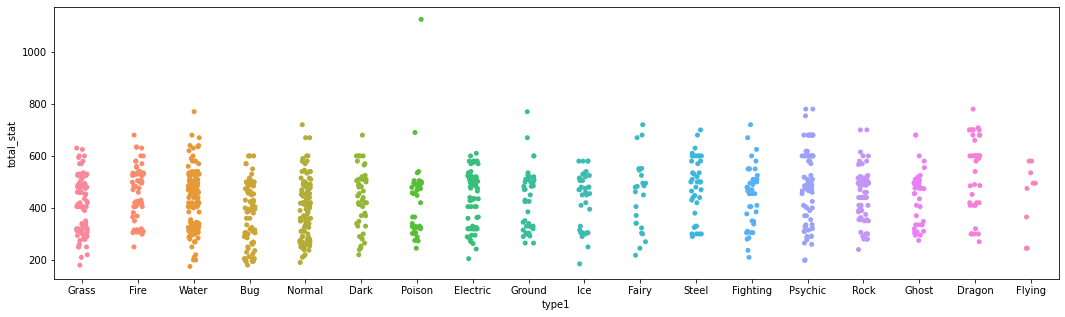

In [13]:
# Total_stat / type1
# Stripplot
fig, ax = plt.subplots(figsize=(18,5))
sns.stripplot(data=df2,x='type1',y='total_stat')

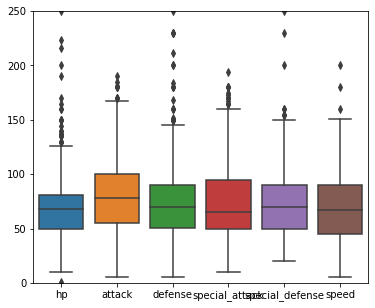

In [33]:
fig, ax = plt.subplots(figsize=(6,5))
# Boxplot
sns.boxplot(data=df2[['hp','attack','defense','special_attack','special_defense','speed']])
plt.ylim(0,250)  #change the scale of y axix
plt.show()

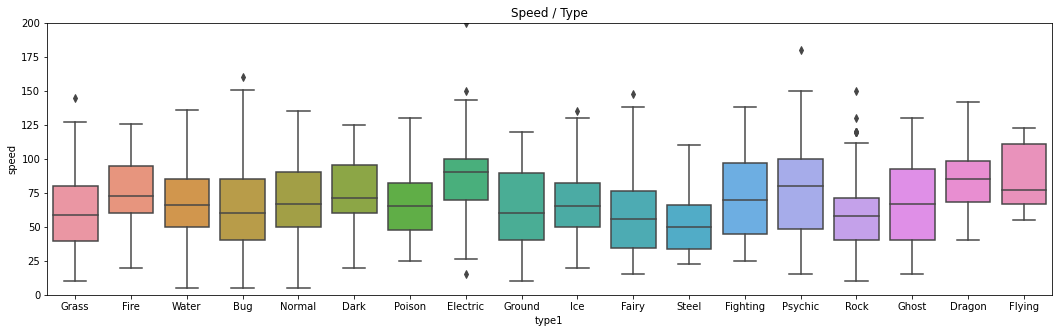

In [35]:
plt.subplots(figsize = (18,5))
plt.title('Speed / Type')
# Boxplot
sns.boxplot(x = "type1", y = "speed",data = df2)
plt.ylim(0,200)
plt.show()

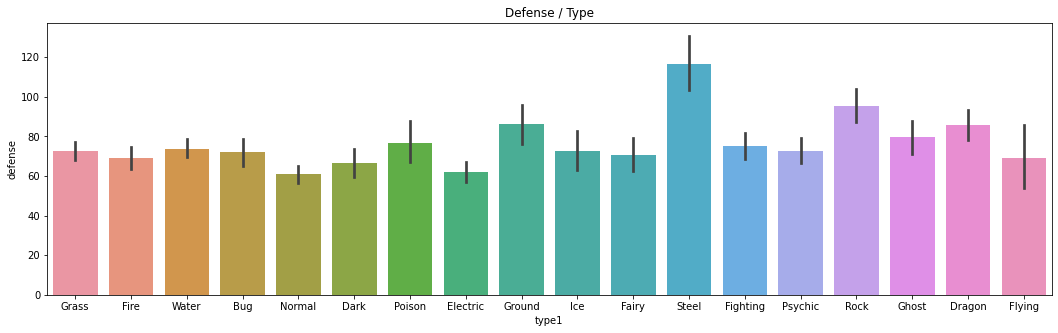

In [232]:
plt.subplots(figsize = (18,5))
plt.title('Defense / Type')
# Barplot
sns.barplot(x = "type1", y = "defense",data = df2)
plt.show()

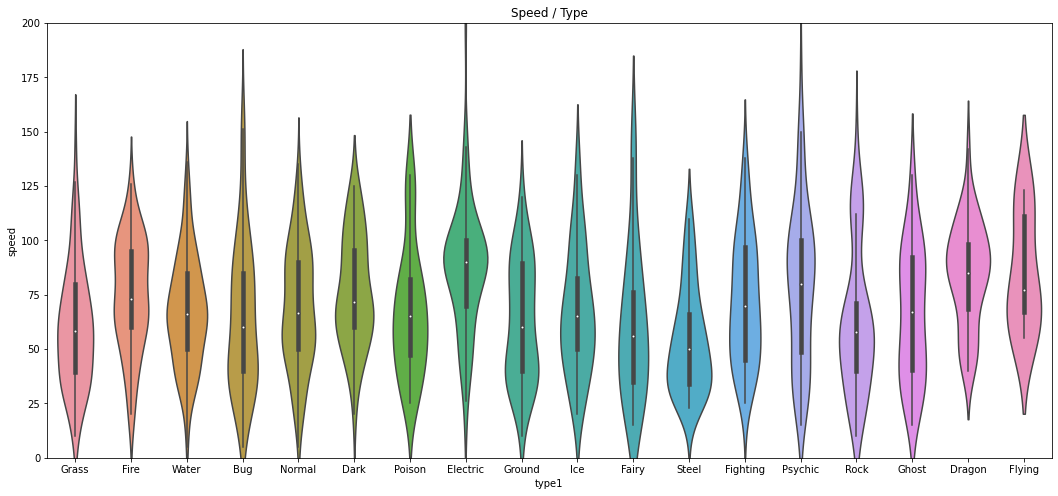

In [233]:
plt.subplots(figsize = (18,8))
plt.title('Speed / Type')
# Violinplot
sns.violinplot(x = "type1", y = "speed",data = df2)
plt.ylim(0,200)
plt.show()

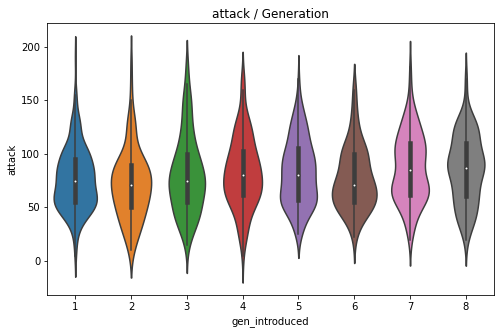

In [417]:
# Distribution de la stat de hp par generation
plt.subplots(figsize = (8,5))
plt.title('attack / Generation')
# Violinplot
sns.violinplot(x = "gen_introduced", y = "attack",data = df2)
plt.show()

C:\Users\Defaut2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Defaut2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Defaut2\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

[Text(0.5, 1.0, 'Distribution des statistiques')]

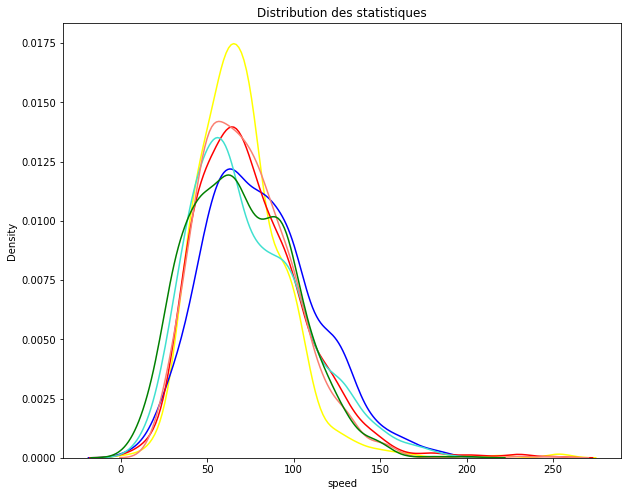

In [14]:
# Distribution de nos statistiques
fig, ax = plt.subplots(figsize=(10,8))
# Distplot
distrib = sns.distplot(df2['hp'],color='yellow',hist=False,ax=ax)
distrib = sns.distplot(df2['attack'],color='blue',hist=False,ax=ax)
distrib = sns.distplot(df2['defense'],color='red',hist=False,ax=ax)
distrib = sns.distplot(df2['special_attack'],color='turquoise',hist=False,ax=ax)
distrib = sns.distplot(df2['special_defense'],color='salmon',hist=False,ax=ax)
distrib = sns.distplot(df2['speed'],color='green',hist=False,ax=ax)
distrib.set(title='Distribution des statistiques')

[Text(0.5, 1.0, 'Correlations entre statistiques pokemon')]

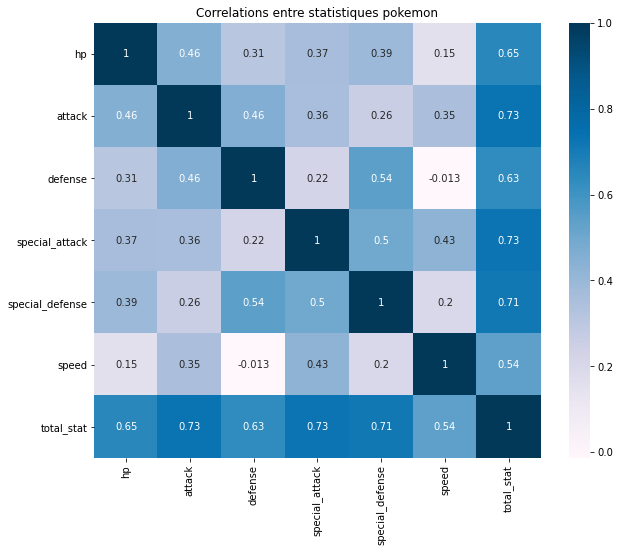

In [431]:
# Recherche de correlations entre stats
dfcor = df2[["hp","attack","defense","special_attack","special_defense","speed","total_stat"]]
fig, ax = plt.subplots(figsize=(10,8))
# Heatmat
"""
Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, 
PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, 
YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, 
gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako,
 mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, 
twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
"""
corel = sns.heatmap(dfcor.corr(),annot=True,ax=ax,cmap='PuBu')
corel.set(title='Correlations entre statistiques pokemon')

### Visualisation sur les pokemon legendaires

Les legendaires meritent-ils leur titre au niveau stats ?

C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.7% of the points c

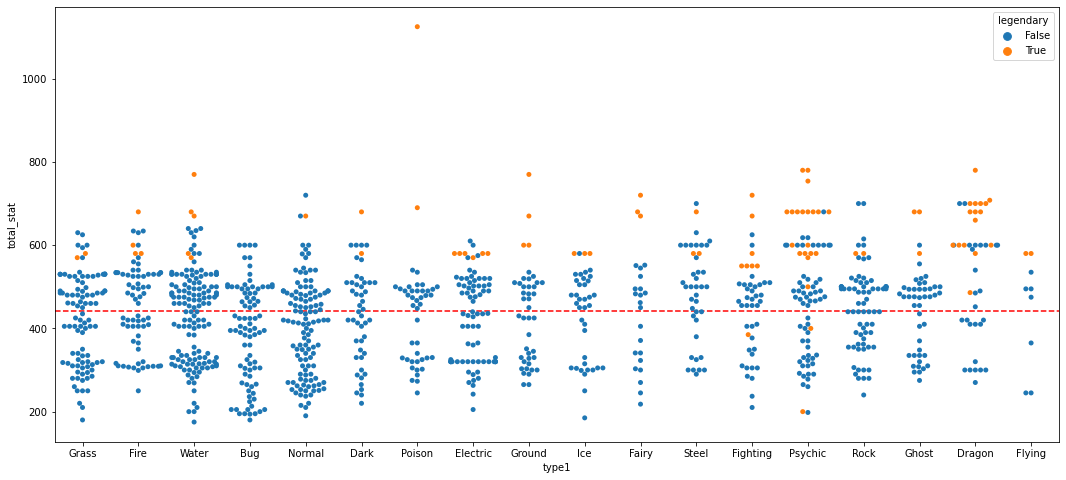

In [235]:
fig, ax = plt.subplots(figsize=(18,8))
# Swarmplot
sns.swarmplot(x='type1',y='total_stat',data=df2,hue='legendary') # this plot shows the points belonging to individual pokemons
plt.axhline(df2['total_stat'].mean(),color='red',linestyle='dashed')
plt.show()

C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\33781\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


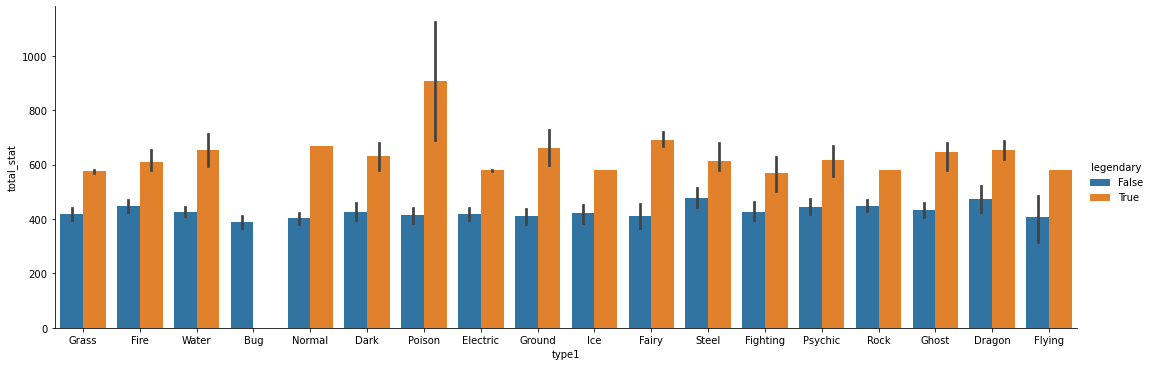

In [278]:
# Factorplot
sns.factorplot(x='type1',y='total_stat',hue='legendary',data=df2,kind='bar',aspect=3,size=5)

### Visualisation sur les types de pokemon au fil des genenerations

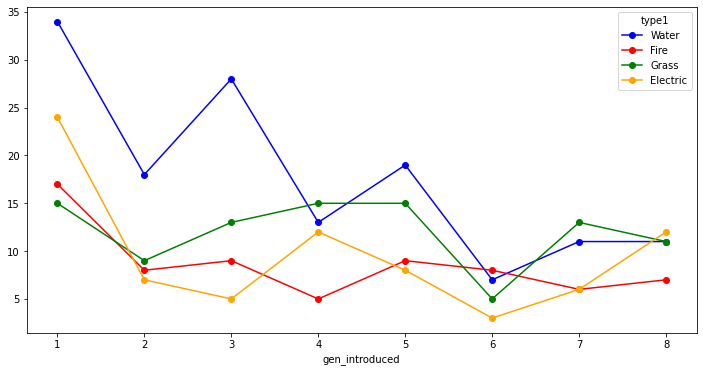

In [27]:
# Il y a une tentative d'equilibrage de la representation des types au fil des generations
a=df2.groupby(['gen_introduced','type1']).count().reset_index()
a=a[['gen_introduced','type1','total_stat']]
a=a.pivot('gen_introduced','type1','total_stat')
a[['Water','Fire','Grass','Electric']].plot(color=['b','r','g','#FFA500','brown','#6666ff','#001012','y'],marker='o')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Text(0.5, 1.0, 'Pokemon / Type1')

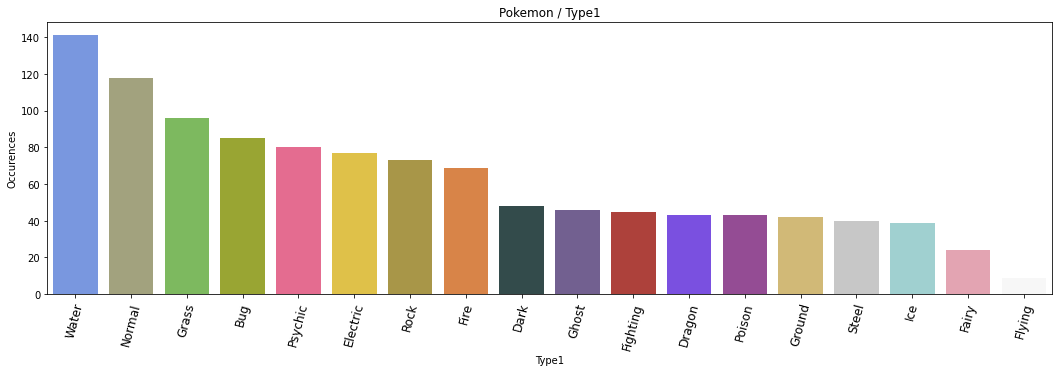

In [440]:
# On en est où en Gen8 sur la representation des types ?
fig, ax = plt.subplots(figsize=(18,5))
type1 = pd.value_counts(df2['type1'])
colortype =  [
    '#6890F0',  # Water
    '#A8A878',  # Normal
    '#78C850',  # Grass
    '#A8B820',  # Bug
    '#F85888',  # Psychic
    '#F8D030',  # Electric
    '#B8A038',  # Rock
    '#F08030',  # Fire
    '#2F4F4F',  # Dark
    '#705898',  # Ghost
    '#C03028',  # Fighting
    '#7038F8',  # Dragon
    '#A040A0',  # Poison
    '#E0C068',  # Ground
    '#C7C7C7',  # Steel
    '#98D8D8',  # Ice
    '#EE99AC',  # Fairy
    '#F7F7F7'   # Flying          
            ]
bar = sns.barplot(x=type1.index,y=type1,data=df2,palette=colortype,ax=ax)
bar.set_xticklabels(bar.get_xticklabels(),rotation=75,fontsize=12)
bar.set(xlabel='Type1',ylabel='Occurences')
bar.set_title('Pokemon / Type1')

In [33]:
df2.reset_index()
df2.set_index('name')

# Chxoi de nos deux pokemon selon leur index dans df2
pok1= df2.loc[df2['name'] == 'Pikachu']
pok2= df2.loc[df2['name'] == 'Raichu']
pok2


,name,hp,attack,defense,special_attack,special_defense,speed,gen_introduced,legendary,type1,type2,total_stat
52,Raichu,60,90,55,90,80,110,1,False,Electric,Electric,485


### Visualisation pour comparer le potentiel de deux pokemon

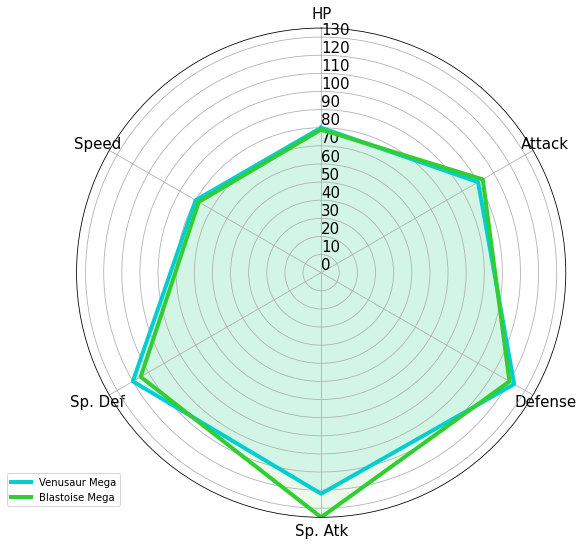

In [210]:
df2.reset_index()
df2.set_index('name')

# Chxoi de nos deux pokemon selon leur index dans df2
pok1= df2.iloc[4]
pok2= df2.iloc[15]

# Figure
fig = plt.figure(figsize=(9,9))
color1='darkturquoise'
color2='limegreen'

# Data
dfcomp = pd.DataFrame({
'group': [pok1['name'],pok2['name']],
'HP': [pok1["hp"], pok2["hp"]],
'Attack': [pok1["attack"], pok2["attack"]],
'Defense': [pok1["defense"], pok2["defense"]],
'Sp. Atk': [pok1["special_attack"], pok2["special_attack"]],
'Sp. Def': [pok1["special_defense"], pok2["special_defense"]],
'Speed': [pok1["speed"], pok2["speed"]]
})

# Maximum des stats pour l'échelle du radar chart
maximum=max([pok1["hp"], pok2["hp"], pok1["attack"], pok2["attack"],pok1["defense"], pok2["defense"],pok1["special_attack"], pok2["special_attack"],
pok1["special_defense"], pok2["special_defense"],pok1["speed"], pok2["speed"]])
 
# 1: Background
 
# Variables
categories=['HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed']
N = len(categories)
aa=[]
aaa=[]
for i in range(maximum):
    aa.append(i*10)
    aaa.append(str(i*10))
    
# Angles entre axe/stats sur le radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialisation
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Axe = variable + labeling
plt.xticks(angles[:-1], categories,size=15,color="black")
ax.set_rlabel_position(0)
plt.yticks(aa, aaa, color="black", size=15)
plt.ylim(0,maximum)

#  2: Ajout des plots
 
# Pokemon 1
values=dfcomp.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=4, linestyle='solid', label=pok1['name'],color=color1)
ax.fill(angles, values, color1, alpha=0.1)
 
# Pokemon 2
values=dfcomp.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=4, linestyle='solid', label=pok2['name'],color=color2)
ax.fill(angles, values, color2, alpha=0.1)
 
# Legende
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))